In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as data
import sklearn
from sklearn.model_selection import *
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score 
import seaborn as sns

In [ ]:
pwd

'/content'

17999
(17999, 13)


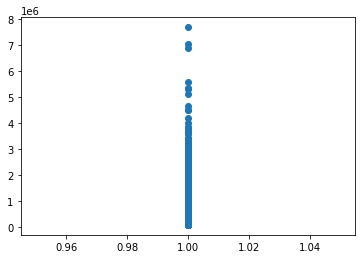

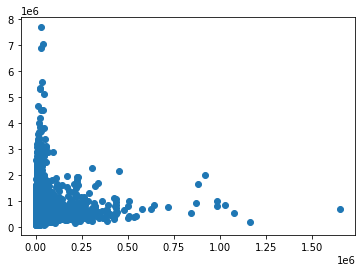

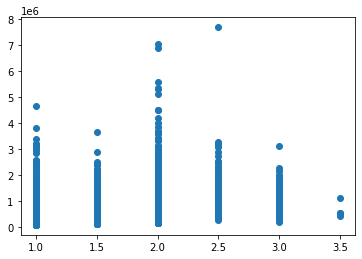

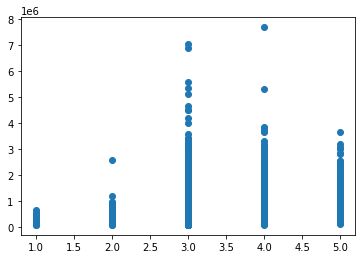

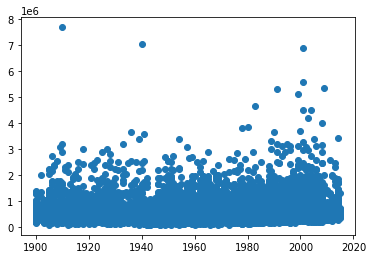

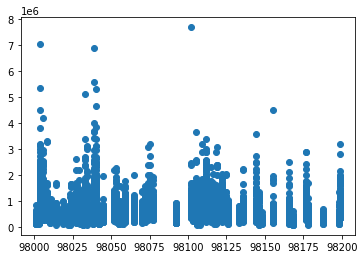

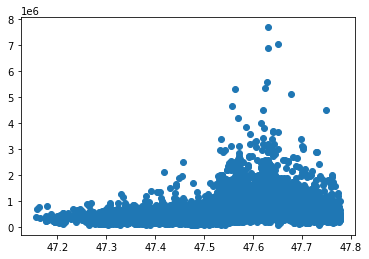

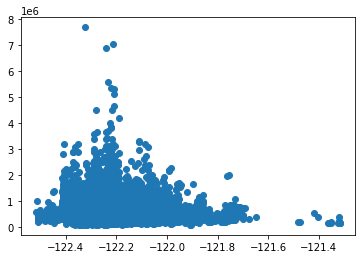

(17999, 13)


In [3]:
datasheet = data.read_excel(r'MLdata.xlsx', dtype=None)
MyTrainingData = data.DataFrame(datasheet)
X = MyTrainingData.copy()
col_corr = set() 
def correlation(dataset, threshold):
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]
    return dataset
X = data.DataFrame(correlation(X,0.5))              
X = data.DataFrame(X.drop('price',axis=1).values)
X = data.DataFrame(X.drop(0,axis=1).values)
X = data.DataFrame(X.drop(0,axis=1).values)

X = np.array(X, dtype=float)
y = MyTrainingData["price"].values
m = y.size
X = np.insert(X,0,np.ones(m), axis=1)
rows,cols = X.shape
# index features that might benefit from a polynomial
Index = np.where(X.min(0) >= 1)[0]
Index = np.append(Index,np.where(X.max(0) < 0)[0])
print(y.size)
print(X.shape)
#scatter plot test to see how they look and choose 3
for i in range(Index.size):
  plt.figure()
  plt.scatter(x=X[:,Index[i]],y= y)           
plt.show()
Index = np.delete(Index, 0)
Index = np.delete(Index, 2)
Index = np.delete(Index, 3)
print(X.shape)



In [4]:
def makePoly(X,degree):
  rows,cols = X.shape
  for i in range(Index.size):
    Pol = np.power(X[:,Index[i]],degree)
    X = np.column_stack([X,Pol])
  return X
print(makePoly(X,3))

[[ 1.00000000e+00  3.00000000e+00  5.65000000e+03 ...  7.47205888e+09
   1.07247703e+05 -1.82734775e+06]
 [ 1.00000000e+00  3.00000000e+00  7.24200000e+03 ...  7.42628835e+09
   1.08674739e+05 -1.83012926e+06]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+04 ...  7.22263324e+09
   1.08790239e+05 -1.82627180e+06]
 ...
 [ 1.00000000e+00  2.00000000e+00  7.12800000e+03 ...  7.76239200e+09
   1.06468117e+05 -1.82430031e+06]
 [ 1.00000000e+00  3.00000000e+00  3.27720000e+04 ...  7.90438349e+09
   1.08056945e+05 -1.81531223e+06]
 [ 1.00000000e+00  2.00000000e+00  1.25000000e+04 ...  7.44915018e+09
   1.06843250e+05 -1.82421073e+06]]


In [5]:
   def computeCostMulti(X, y, theta):
    # Initialize some useful values
    m = y.size  # number of training examples
    const = 0.5*(1/m)
    H = np.dot(X,np.transpose(theta))
    # You need to return the following variables correctly
    J = 0
    for i in range(m):
        J = J + (H[i]-y[i])**2
    J = const*J
    return J

In [6]:
def gradientDescent(X, y, theta, alpha, epoch):
    J=[]
    k=0
    while k < epoch:
        y11 = theta*X
        y1 = np.sum(y11, axis=1)
        for c in range(X.shape[1]):
            theta[c] = theta[c] - alpha*sum((y1-y)* X[:, c])/m
        j = computeCostMulti(X, y, theta)
        J.append(j)
        k += 1
    return J, theta


In [7]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    mu = np.mean(X_norm,axis=0)
    sigma = np.zeros(X.shape[1])
    sigma = np.std(X_norm, axis=0)

    # =========================== YOUR CODE HERE =====================
    for i in range(len(X_norm.T)):
           X_norm[:,i] = (X_norm[:,i]-mu[i])/sigma[i]
           print(i)
    # ================================================================
    return X_norm, mu, sigma



In [20]:
#using Kfold cross-validation
folds = KFold(n_splits = 5, random_state = 100, shuffle = True)
X1 = makePoly(X,2)
Z1 = featureNormalize(X1)
X1 = Z1[0]
X2 = makePoly(X,3)
Z2 = featureNormalize(X2)
X2 = Z2[0]
X3 = makePoly(X,4)
Z3 = featureNormalize(X3)
X3 = Z3[0]
X1 = (X1[:, ~np.isnan(X1).any(axis=0)])
X2 = (X2[:, ~np.isnan(X2).any(axis=0)])
X3 = (X3[:, ~np.isnan(X3).any(axis=0)])

for train_index, test_index in folds.split(X1, y):
        X_train_fold, X_test_fold = X1[train_index], X1[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        theta = np.ones(X1.shape[1])
        J_history,theta1 = gradientDescent(X_train_fold,y_train_fold,theta,0.03,100)
        y_pred = np.dot(X_test_fold,theta1)
        score = np.sqrt(mean_squared_error(y_pred,y_test_fold))
print(score)
#degree 2 was the best

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
582494.402263192


In [17]:
#using StratifiedKFold cross-validation
folds = StratifiedKFold(n_splits = 10, random_state = 100, shuffle = True)
X1 = makePoly(X,2)
Z1 = featureNormalize(X1)
X1 = Z1[0]
X2 = makePoly(X,3)
Z2 = featureNormalize(X2)
X2 = Z2[0]
X3 = makePoly(X,4)
Z3 = featureNormalize(X3)
X3 = Z3[0]
X1 = (X1[:, ~np.isnan(X1).any(axis=0)])
X2 = (X2[:, ~np.isnan(X2).any(axis=0)])
X3 = (X3[:, ~np.isnan(X3).any(axis=0)])

scoresfold = np.empty(10)
scores = np.empty(3)
for train_index, test_index in folds.split(X2, y):
        X_train_fold, X_test_fold = X2[train_index], X2[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        theta = np.ones(X2.shape[1])
        J_history,theta1 = gradientDescent(X_train_fold,y_train_fold,theta,0.03,100)
        y_pred = np.dot(X_test_fold,theta1)
        score = np.sqrt(mean_squared_error(y_pred,y_test_fold))
print(score)
#degree 2 was the best

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
618974.7385854494


In [10]:
def RegcomputeCostMulti(X, y, theta,lambd):
   
    # Initialize some useful values
    m = y.size  # number of training examples
    const = 0.5*(1/m)
    constReg = lambd/2*m
    n = theta.size
    H = np.dot(X,np.transpose(theta))
    # You need to return the following variables correctly
    J = 0
    Reg = 0
    for i in range(m):
        J = J +(const * (H[i]-y[i])**2)
    for j in range(n):
        Reg = Reg + constReg*(theta[j]**2)
    J = J + Reg
    # ===========================================================
    return J

In [11]:

def RegradientDescentMulti(X, y, theta, alpha, num_iters,lambd):
# Initialize some useful values
    m = y.shape[0]  
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy() 
    J_history = []
    theta0 = theta.copy()
    for i in range(num_iters):
        sumofh0x=np.dot(X,theta)
        theta0=theta0-((alpha/m)*(np.dot(X.T,(np.dot(X,theta0))-y)))
        theta = ((theta*(1-(alpha*lambd)/m))-((alpha/m)*(np.dot(X.T,sumofh0x-y))))
        theta[0] = theta0[0]
    J_history = RegcomputeCostMulti(X, y, theta,lambd)
    return theta, J_history


In [ ]:
X = (X[:, ~np.isnan(X).any(axis=0)])
print(X1.shape)
print(X.shape)
lambd = np.array([0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24])
X_train, X_valid, y_train, y_valid = train_test_split(X3, y, train_size=0.8, random_state=101)
#for a 60:20:20 split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.75, random_state=101)
#print(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)
alpha = 0.03
num_iters = 100
validCollectedLambd1 = np.zeros(lambd.size)
thetaIn = np.zeros(X_train.shape[1])
for j in range(lambd.size):
                    J_history0, theta0 = gradientDescent(X_train, y_train, thetaIn, alpha, num_iters)
                    theta, J_history = RegradientDescentMulti(X_train, y_train, thetaIn, alpha, num_iters,lambd[j])
                    theta[0] = theta0[0]
                    validCollectedLambd1[j] = computeCostMulti(X_valid,y_valid,theta)
print(validCollectedLambd1)
BestLambda = np.argmin(validCollectedLambd1)
print(BestLambda)
for k in range(lambd.size):
  Testing,TestingCost = RegradientDescentMulti(X_test, y_test, thetaIn, alpha, num_iters,lambd[k])
  validCollectedLambd1[k] = TestingCost
print(validCollectedLambd1)

(17999, 17)
(17999, 13)
[1.78956896e+11 1.78803671e+11 1.78706452e+11 1.78649205e+11
 1.78615385e+11 1.78595524e+11 1.78584075e+11 1.78577706e+11
 1.78574395e+11 1.78572946e+11 1.78572701e+11 1.78573414e+11]
10
[1.81038074e+11 1.28766746e+12 2.39428060e+12 4.60745810e+12
 9.03361804e+12 1.78851577e+13 3.55851168e+13 7.09725580e+13
 1.41697566e+14 2.82948354e+14 5.64655152e+14 1.12490666e+15]


# New Section